In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import torch
from torch import nn
from torchsummary import summary

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
import numpy as np
import torch

from torch import nn
from torch.nn import functional as F
from PIL import Image
from torchvision import transforms, datasets
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [3]:
dataset = datasets.CIFAR100(root='data/', train=True, download=True)


class MyOwnCifar(torch.utils.data.Dataset):
   
    def __init__(self, init_dataset, transform=None):
        self._base_dataset = init_dataset
        self.transform = transform

    def __len__(self):
        return len(self._base_dataset)

    def __getitem__(self, idx):
        img = self._base_dataset[idx][0]
        if self.transform is not None:
            img = self.transform(img)
        return img, self._base_dataset[idx][1]

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/


In [4]:
train_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=5, scale=(0.3, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [6]:
def train_valid_split(Xt):
    X_train, X_test = train_test_split(Xt, test_size=0.05, random_state=13)
    return X_train, X_test
train_dataset, valid_dataset = train_valid_split(dataset)

In [7]:
train_dataset = MyOwnCifar(train_dataset, train_transforms)
valid_dataset = MyOwnCifar(valid_dataset, test_transforms)

In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                          batch_size=32,
                          shuffle=False,
                          num_workers=1)

In [10]:
classes = ['mammalsbeaver',
 'dolphin',
 'otter',
 'seal',
 'whale',
 'aquariumfish',
 'flatfish',
 'ray',
 'shark',
 'trout',
 'orchids',
 'poppies',
 'roses',
 'sunflowers',
 'tulips',
 'containersbottles',
 'bowls',
 'cans',
 'cups',
 'plates',
 'apples',
 'mushrooms',
 'oranges',
 'pears',
 'sweetpeppers',
 'clock',
 'computerkeyboard',
 'lamp',
 'telephone',
 'television',
 'furniturebed',
 'chair',
 'couch',
 'table',
 'wardrobe',
 'bee',
 'beetle',
 'butterfly',
 'caterpillar',
 'cockroach',
 'bear',
 'leopard',
 'lion',
 'tiger',
 'wolf',
 'bridge',
 'castle',
 'house',
 'road',
 'skyscraper',
 'cloud',
 'forest',
 'mountain',
 'plain',
 'sea',
 'camel',
 'cattle',
 'chimpanzee',
 'elephant',
 'kangaroo',
 'fox',
 'porcupine',
 'possum',
 'raccoon',
 'skunk',
 'crab',
 'lobster',
 'snail',
 'spider',
 'worm',
 'baby',
 'boy',
 'girl',
 'man',
 'woman',
 'crocodile',
 'dinosaur',
 'lizard',
 'snake',
 'turtle',
 'hamster',
 'mouse',
 'rabbit',
 'shrew',
 'squirrel',
 'maple',
 'oak',
 'palm',
 'pine',
 'willow',
 'bicycle',
 'bus',
 'motorcycle',
 'pickuptruck',
 'train',
 'lawn-mower',
 'rocket',
 'streetcar',
 'tank',
 'tractor']

torch.Size([32, 3, 32, 32])
bridge


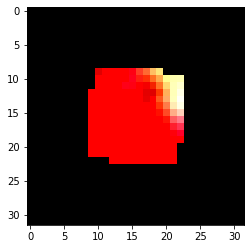

In [12]:
import matplotlib.pyplot as plt


for img, lbl in train_loader:
    print(img.shape)
    print(classes[lbl[0]])
    plt.imshow(img[0].permute(1, 2, 0))
    break

In [14]:
from torchvision import models

resnet = models.resnet50(pretrained=True)
summary(resnet.to(device), input_size=(3, 224, 224))

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [15]:
for param in resnet.parameters():
    param.requires_grad = False

In [16]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
in_features = resnet.fc.in_features
fc = nn.Linear(in_features=in_features, out_features=len(classes))
resnet.fc = fc

summary(resnet.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [18]:
params_to_update = []
for name, param in resnet.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

        
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=0.001)

In [19]:
from time import time
from tqdm import tqdm


def train(model,
          criterion,
          optimizer,
          train_dataloader,
          test_dataloader,
          print_every,
          num_epoch):
    steps = 0
    train_losses, val_losses = [], []

    model.to(device)
    for epoch in tqdm(range(num_epoch)):
        running_loss = 0
        correct_train = 0
        total_train = 0
        start_time = time()
        iter_time = time()
        
        model.train()
        for i, (images, labels) in enumerate(train_dataloader):
            steps += 1
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            output = model(images)
            loss = criterion(output, labels)

            correct_train += (torch.max(output, dim=1)[1] == labels).sum()
            total_train += labels.size(0)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Logging
            if steps % print_every == 0:
                print(f'Epoch [{epoch + 1}]/[{num_epoch}]. Batch [{i + 1}]/[{len(train_dataloader)}].', end=' ')
                print(f'Train loss {running_loss / steps:.3f}.', end=' ')
                print(f'Train acc {correct_train / total_train * 100:.3f}.', end=' ')
                with torch.no_grad():
                    model.eval()
                    correct_val, total_val = 0, 0
                    val_loss = 0
                    for images, labels in test_dataloader:
                        images = images.to(device)
                        labels = labels.to(device)
                        output = model(images)
                        loss = criterion(output, labels)
                        val_loss += loss.item()

                        correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                        total_val += labels.size(0)

                print(f'Val loss {val_loss / len(test_dataloader):.3f}. Val acc {correct_val / total_val * 100:.3f}.', end=' ')
                print(f'Took {time() - iter_time:.3f} seconds')
                iter_time = time()

                train_losses.append(running_loss / total_train)
                val_losses.append(val_loss / total_val)


        print(f'Epoch took {time() - start_time}') 
        torch.save(model, f'checkpoint_{correct_val / total_val * 100:.2f}')
        
    return model, train_losses, val_losses

In [21]:
print_every = 50
num_epoch = 2

resnet, train_losses, val_losses = train(
    model=resnet,
    criterion=criterion,
    optimizer=optimizer,
    train_dataloader=train_loader,
    test_dataloader=valid_loader,
    print_every=print_every,
    num_epoch=num_epoch
)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch [1]/[2]. Batch [50]/[1485]. Train loss 5.093. Train acc 2.000. Val loss 5.810. Val acc 1.200. Took 9.403 seconds
Epoch [1]/[2]. Batch [100]/[1485]. Train loss 4.993. Train acc 2.531. Val loss 6.423. Val acc 0.840. Took 9.092 seconds
Epoch [1]/[2]. Batch [150]/[1485]. Train loss 4.965. Train acc 2.646. Val loss 6.390. Val acc 1.320. Took 9.133 seconds
Epoch [1]/[2]. Batch [200]/[1485]. Train loss 4.948. Train acc 2.828. Val loss 6.312. Val acc 1.200. Took 9.192 seconds
Epoch [1]/[2]. Batch [250]/[1485]. Train loss 4.930. Train acc 2.925. Val loss 6.728. Val acc 1.400. Took 9.319 seconds
Epoch [1]/[2]. Batch [300]/[1485]. Train loss 4.928. Train acc 3.042. Val loss 7.330. Val acc 0.560. Took 9.498 seconds
Epoch [1]/[2]. Batch [350]/[1485]. Train loss 4.917. Train acc 3.152. Val loss 7.117. Val acc 1.000. Took 10.363 seconds
Epoch [1]/[2]. Batch [400]/[1485]. Train loss 4.915. Train acc 3.227. Val loss 7.479. Val acc 0.800. Took 9.449 seconds
Epoch [1]/[2]. Batch [450]/[1485]. Train

 50%|█████     | 1/2 [04:35<04:35, 275.30s/it]

Epoch took 275.11617517471313
Epoch [2]/[2]. Batch [15]/[1485]. Train loss 0.049. Train acc 5.000. Val loss 8.483. Val acc 1.160. Took 8.430 seconds
Epoch [2]/[2]. Batch [65]/[1485]. Train loss 0.225. Train acc 3.846. Val loss 8.911. Val acc 1.240. Took 10.243 seconds
Epoch [2]/[2]. Batch [115]/[1485]. Train loss 0.391. Train acc 3.614. Val loss 9.019. Val acc 1.240. Took 9.450 seconds
Epoch [2]/[2]. Batch [165]/[1485]. Train loss 0.549. Train acc 3.598. Val loss 7.902. Val acc 1.280. Took 9.392 seconds
Epoch [2]/[2]. Batch [215]/[1485]. Train loss 0.696. Train acc 3.532. Val loss 8.496. Val acc 0.920. Took 9.352 seconds
Epoch [2]/[2]. Batch [265]/[1485]. Train loss 0.839. Train acc 3.550. Val loss 8.420. Val acc 0.880. Took 9.325 seconds
Epoch [2]/[2]. Batch [315]/[1485]. Train loss 0.980. Train acc 3.452. Val loss 8.842. Val acc 1.040. Took 9.417 seconds
Epoch [2]/[2]. Batch [365]/[1485]. Train loss 1.119. Train acc 3.493. Val loss 8.624. Val acc 1.040. Took 9.381 seconds
Epoch [2]/[

100%|██████████| 2/2 [09:19<00:00, 279.89s/it]
